# 알고리즘 17일차 (문제풀이)

In [ ]:
# 1238 [S/W 문제해결 기본] 10일차 - Contact

from collections import deque


def bfs(s):
    global adj
    q = deque()
    v = [0] * 101
    ret = s

    q.append(s)
    v[s] = 1

    while q:
        c = q.popleft()
        if v[ret] < v[c] or v[ret] == v[c] and ret < c:
            ret = c

        for i in adj[c]:
            if not v[i]:
                q.append(i)
                v[i] = v[c] + 1

    return ret


T = 10

for test_case in range(1, T + 1):
    N, S = map(int, input().split())
    lst = list(map(int, input().split()))

    # [1] 인접리스트에 연결 저장
    adj = [[] for _ in range(101)]

    for i in range(0, len(lst), 2):
        s, e = lst[i], lst[i + 1]
        adj[s].append(e)

    ans = bfs(S)
    print(f"#{test_case} {ans}")


In [ ]:
# 14032 정사각형 방 (제출용)

from collections import deque


def bfs(si, sj):
    global arr, v

    q = deque()
    alst = []
    v[si][sj] = 1
    q.append((si, sj))
    alst.append(arr[si][sj])

    while q:
        ci, cj = q.popleft()

        for di, dj in ((-1, 0), (1, 0), (0, -1), (0, 1)):
            ni, nj = ci + di, cj + dj

            if 0 <= ni < n and 0 <= nj < n and v[ni][nj] == 0 and\
                    abs(arr[ci][cj] - arr[ni][nj]) == 1:
                q.append((ni, nj))
                v[ni][nj] = 1
                alst.append(arr[ni][nj])

    return min(alst), len(alst)


T = int(input())
for test_case in range(1, T + 1):
    n = int(input())
    arr = [list(map(int, input().split())) for _ in range(n)]
    v = [[0]*n for _ in range(n)]
    ans = n * n
    cnt = 0

    for si in range(n):
        for sj in range(n):
            if v[si][sj] == 0:
                t, tcnt = bfs(si, sj)
                if cnt < tcnt or (cnt == tcnt and ans > t):
                    ans, cnt = t, tcnt

    print(f"#{test_case} {ans}")


In [ ]:
# 13984 [모의 SW 역량테스트] 탈주범 검거
p = [[], [0, 1, 2, 3], [0, 1], [2, 3], [0, 3], [1, 3], [1, 2], [0, 2]]
opp = {0: 1, 1: 0, 2: 3, 3: 2}
di, dj = [-1, 1, 0, 0], [0, 0, -1, 1]


def bfs(si, sj, L):
    q = []  # [0]
    v = [[0]*M for _ in range(N)]   # 가로 세로 다를때 특히 주의!!!!

    q.append((si, sj))
    v[si][sj] = 1
    cnt = 1

    while q:
        ci, cj = q.pop(0)
        if v[ci][cj] == L:
            return cnt

        for dr in p[arr[ci][cj]]:  # 현재위치 파이프에 연결된 방향 하나씩 처리
            ni, nj = ci+di[dr], cj+dj[dr]
            if 0 <= ni < N and 0 <= nj < M and v[ni][nj] == 0 and\
                    opp[dr] in p[arr[ni][nj]]:  # 내 방향으로 연결된 파이프가 이동할 방향에 있다면..
                q.append((ni, nj))
                v[ni][nj] = v[ci][cj]+1
                cnt += 1
    # 이경우 -1값을 리턴???
    # 공간이 좁아서 L일전에 모두 방문!
    return cnt


T = int(input())
for test_case in range(1, T + 1):
    N, M, R, C, L = map(int, input().split())
    arr = [list(map(int, input().split())) for _ in range(N)]

    ans = bfs(R, C, L)
    print(f'#{test_case} {ans}')


In [1]:
# 2117 [모의 SW 역량테스트] 홈 방범 서비스
# BFS: 4방향 범위 내, 미방문, cnt += 1
# v[ci][cj] 변경될 때 정답 갱신

cost = [((k*k)+(k-1)*(k-1)) for k in range(40)]


def solve_loop():
    mx = 0
    for si in range(N):
        for sj in range(N):  # 가능한 모든 시작위치
            for k in range(1, 2*N):
                cnt = 0
                for i in range(si-k+1, si+k):
                    t = abs(si-i)
                    for j in range(sj-k+1+t, sj+k-t):
                        if 0 <= i < N and 0 <= j < N:
                            cnt += arr[i][j]    # 집위치를 더하기(집이 1이니 집 개수 추가)
                # 운영비용 보다 수익이 같거나 큰 경우 정답갱신
                # if ((k*k)+(k-1)*(k-1))<=cnt*M:
                if cost[k] <= cnt*M:
                    mx = max(mx, cnt)
    return mx


def bfs(si, sj):
    q = []
    v = [[0]*N for _ in range(N)]
    old = 0
    mx = 0

    q.append((si, sj))
    v[si][sj] = 1
    cnt = arr[si][sj]   # 시작좌표가 집이면 1, 아니면 0

    while q:
        ci, cj = q.pop(0)
        if old != v[ci][cj]:    # k값이 달라진경우
            old = v[ci][cj]
            if cost[v[ci][cj]] <= cnt*M:
                mx = max(mx, cnt)

        for di, dj in ((-1, 0), (1, 0), (0, -1), (0, 1)):
            ni, nj = ci+di, cj+dj
            if 0 <= ni < N and 0 <= nj < N and v[ni][nj] == 0:
                q.append((ni, nj))
                v[ni][nj] = v[ci][cj]+1
                cnt += arr[ni][nj]
    return mx


def solve_bfs():
    mx = 0
    for si in range(N):
        for sj in range(N):  # 가능한 모든 시작위치
            mx = max(mx, bfs(si, sj))
    return mx


T = int(input())
for test_case in range(1, T + 1):
    N, M = map(int, input().split())  # M: 비용
    arr = [list(map(int, input().split())) for _ in range(N)]

    # ans = solve_loop()
    ans = solve_bfs()
    print(f'#{test_case} {ans}')


In [ ]:
# 2117 [모의 SW 역량테스트] 홈 방범 서비스
# 범위기준, 표시 후 확산!
# 집 기준 접근!
# [1] 집 좌표를 저장
# [2] 각 기준 위치에서 집 거리를 표시한다. (누적해서 표시)
# 한결이 형 생각이랑 똑같은 듯

cost = [((k*k)+(k-1)*(k-1)) for k in range(40)]


def solve_loop():
    mx = 0
    for si in range(N):
        for sj in range(N):  # 가능한 모든 시작위치
            for k in range(1, 2*N):
                cnt = 0
                for i in range(si-k+1, si+k):
                    t = abs(si-i)
                    for j in range(sj-k+1+t, sj+k-t):
                        if 0 <= i < N and 0 <= j < N:
                            cnt += arr[i][j]    # 집위치를 더하기(집이 1이니 집 개수 추가)
                # 운영비용 보다 수익이 같거나 큰 경우 정답갱신
                # if ((k*k)+(k-1)*(k-1))<=cnt*M:
                if cost[k] <= cnt*M:
                    mx = max(mx, cnt)
    return mx


def bfs(si, sj):
    q = []
    v = [[0]*N for _ in range(N)]
    old = 0
    mx = 0

    q.append((si, sj))
    v[si][sj] = 1
    cnt = arr[si][sj]   # 시작좌표가 집이면 1, 아니면 0

    while q:
        ci, cj = q.pop(0)
        if old != v[ci][cj]:    # k값이 달라진경우
            old = v[ci][cj]
            if cost[v[ci][cj]] <= cnt*M:
                mx = max(mx, cnt)

        for di, dj in ((-1, 0), (1, 0), (0, -1), (0, 1)):
            ni, nj = ci+di, cj+dj
            if 0 <= ni < N and 0 <= nj < N and v[ni][nj] == 0:
                q.append((ni, nj))
                v[ni][nj] = v[ci][cj]+1
                cnt += arr[ni][nj]
    return mx


def solve_bfs():
    mx = 0
    for si in range(N):
        for sj in range(N):  # 가능한 모든 시작위치
            mx = max(mx, bfs(si, sj))
    return mx


def solve_idea():
    mx = 0
    home = []
    for si in range(N):
        for sj in range(N):  # [1] 집의 모든 위치를 저장
            if arr[si][sj] == 1:
                home.append((si, sj))

    # [2] 각 기준위치에서 거리별 집의 개수 누적하기
    for si in range(N):
        for sj in range(N):
            dist = [0]*40
            # 거리별 집위치를 누적
            for ti, tj in home:
                t = abs(si-ti)+abs(sj-tj)+1
                dist[t] += 1

            for k in range(1, 40):
                dist[k] += dist[k-1]
                if cost[k] <= dist[k]*M:
                    mx = max(mx, dist[k])
    return mx


T = int(input())
for test_case in range(1, T + 1):
    N, M = map(int, input().split())  # M: 비용
    arr = [list(map(int, input().split())) for _ in range(N)]

    # ans = solve_loop()
    # ans = solve_bfs()
    ans = solve_idea()
    print(f'#{test_case} {ans}')


# 오프라인 17일차

In [ ]:
# # 문제
# 10 70 110 원짜리 동전이 있다
# 거슬러 줄 돈을 입력 받은 후
# 최소 몇개의 동전을 사용하여 거슬러 줄 수 있는지 출력해 주세요
#
# # 설계
# 1. dp 테이블 셋팅 후 (2차원 배열)
# 2. "사용할 동전"으로 딱 나누어 질 때 -> 나눈 몫으로 값넣기
#                   딱 나누어 지지 않을 떄(나머지가 있을때) ->
#                   2-1 몫이 0일떄 (동전값이 너무 크다면) 윗줄에서 구한 값 넣기
#                   2-2 몫이 0이 아닐떄 (동전값이 너무 큰 것이 아니라면)
#                          윗줄에서 구한 값 vs 몫+그줄에서 구한 나머지의 최대치를 비교해서 적은값 넣기
#

# 구현
coin = [10, 70, 110]
n = int(input())
arr = [[0 for _ in range(n + 1)] for _ in range(3)]  # dp 배열 만들기
for i in range(3):  # 동전의 개수만큼 for문 돌리기
    for j in range(n + 1):  # j는 dp테이블의 너비를 뜻함
        mok = j // coin[i]
        if j % coin[i] == 0:    # 나누어 질떄
            arr[i][j] = mok
        else:
            if mok == 0:
                arr[i][j] = arr[i-1][j]  # 윗줄에서 구한 값
            else:
                # 최소값 (윗줄에서 구한값 vs 몫+그줄에서 구한 나머지의 최대치를 비교해서 적은값 넣기)
                arr[i][j] = min(arr[i-1][j], mok + arr[i][j % coin[i]])

print(arr[2][n])


# 오프라인 18일차

#### 중복 순열, 순열, 조합 중복 조합

In [ ]:
def dfs(level, s):
    global k, cnt

    if level == k:
        if s == 10:
            cnt += 1

        return

    for i in range(1, 5):
        dfs(level + 1, s + i)


k = int(input())
cnt = 0

dfs(0, 0)
print(cnt)


In [1]:
# 중복 순열: 전부 출력
# 순열: visited 리스트 사용
# 조합
st = "TKAB"
cnt = 0
path = ['']*3


def bfs(level, start):
    global cnt

    if level == 3:
        print(*path, sep='')
        cnt += 1
        return

    for i in range(start, 4):
        path[level] = st[i]
        bfs(level + 1, i + 1)


bfs(0, 0)
print(cnt)


TKA
TKB
TAB
KAB
4


In [2]:
# 중복조합
st = "TKAB"
cnt = 0
path = ['']*3


def bfs(level, start):
    global cnt

    if level == 3:
        print(*path, sep='')
        cnt += 1
        return

    for i in range(start, 4):
        path[level] = st[i]
        bfs(level + 1, i)  # + 1만 빼면 중복 조합


bfs(0, 0)
print(cnt)


TTT
TTK
TTA
TTB
TKK
TKA
TKB
TAA
TAB
TBB
KKK
KKA
KKB
KAA
KAB
KBB
AAA
AAB
ABB
BBB
20


In [12]:
# 이진트리로 부분집합 구현
st = "ABCD"
cnt = 0
n = 1


def bfs(level, s):
    global cnt, st, n

    if level == 4:
        print(n, s)
        n += 1
        cnt += 1
        return

    for i in range(2):
        if i:
            bfs(level + 1, s + st[level])
        else:
            bfs(level + 1, s)


bfs(0, '')
print("------")
print(cnt)


1 
2 D
3 C
4 CD
5 B
6 BD
7 BC
8 BCD
9 A
10 AD
11 AC
12 ACD
13 AB
14 ABD
15 ABC
16 ABCD
------
16


In [15]:
# 조합으로 풀기
st = "ABCD"
cnt = 0
n = 0


def bfs(level, start=0, s=''):
    global cnt, st, n

    cnt += 1
    n += 1
    print(n, s)

    if level == 4:
        return

    for i in range(start, 4):
        bfs(level + 1, i + 1, s + st[i])


bfs(0)
print("------")
print(cnt)


1 
2 A
3 AB
4 ABC
5 ABCD
6 ABD
7 AC
8 ACD
9 AD
10 B
11 BC
12 BCD
13 BD
14 C
15 CD
16 D
------
16


In [ ]:
def dfs(level, s):
    global mi, lst1, lst2, visited1, visited2

    if level == 12:
        if abs(mi) > abs(s):
            mi = s
        return

    if level % 2:
        for i in range(6):
            if not visited2[i]:
                visited2[i] = 1
                dfs(level + 1, s + lst2[i] * (level + 1))
                visited2[i] = 0
    else:
        for i in range(6):
            if not visited1[i]:
                visited1[i] = 1
                dfs(level + 1, s + lst1[i] * (level + 1))
                visited1[i] = 0


mi = 21e8
lst1 = [-2, 3, 4, 9, -5, 2]
lst2 = [4, 7, -3, -6, -1, 2]
visited1 = [0] * 6
visited2 = [0] * 6

dfs(0, 0)
print(mi)


# 알고리즘 19일차

### 비트 연산

|연산자|연산자의 기능|
|:---:|:---:|
|&|비트 단위로 and 연산을 한다.|
|\||비트단위로 or 연산을 한다.|
|\^|비트 단위로 xor 연산을 한다. (같으면 0 다르면 1)|
|\~|단항 연산자로서 피연산자의 모든 비트를 반전시킨다.|
|\<<|피연산자의 비트 열을 왼쪽으로 이동시킨다.|
|\>>|피연산자의 비트 열을 오른쪽으로 이동시킨다.|

&nbsp;

1 \<< n  
- 2n의 값을 같는다.
- 원소가 n개일 경우의 모든 부분집의 수를 의미한다.  
- Power set(모든 부분 집합)
    - 공집합과 자기 자신을 포함한 모든 부분집합
    - 각 원소가 포함되거나 포함되지 않는 2가지 경우의 수를 계산하면 모든 부분집합의 수가 계산된다.

1 & (1 << j)
- 계산의 결과는 i의 j번째 비트가 1인지 아닌지를 의미한다.

In [1]:
def Bbit_print(i):
    output = ""
    for j in range(7, -1, -1):
        output += "1" if i & (1 << j) else "0"
    print(output)


for i in range(-5, 6):
    print("%3d = " % i, end=' ')
    Bbit_print(i)


 -5 =  11111011
 -4 =  11111100
 -3 =  11111101
 -2 =  11111110
 -1 =  11111111
  0 =  00000000
  1 =  00000001
  2 =  00000010
  3 =  00000011
  4 =  00000100
  5 =  00000101


In [5]:
# 연습문제1: 0과 1로 이루어진 1차배열에서 7개의 byte를 묶어서 10진수로 출력하기
def Bbit_print(i):
    output = ""
    for j in range(7, -1, -1):
        output += "1" if i & (1 << j) else "0"
    print(output, end=' ')


a = 0x10
x = 0x0120304
print("%d = " % a, end=' ')
Bbit_print(a)
print()
print("0%X = " % x, end=' ')
for i in range(0, 4):
    Bbit_print((x >> i*8) & 0xff)


16 =  00010000 
0120304 =  00000100 00000011 00010010 00000000 

### 엔디안(Endianness)
- 컴퓨터의 메모리와 같은 1차원의 공간에 여러 개의 연속된 대상을 배열하는 방법을 의미하며 HW아키텍처마다 다르다.
- 주의: 속도 향상을 위해 바이트 단위와 워드 단위를 변환하여 연산할 때, 올바로 이해하지 않으면 오류를 발생 시킬 수 있다.

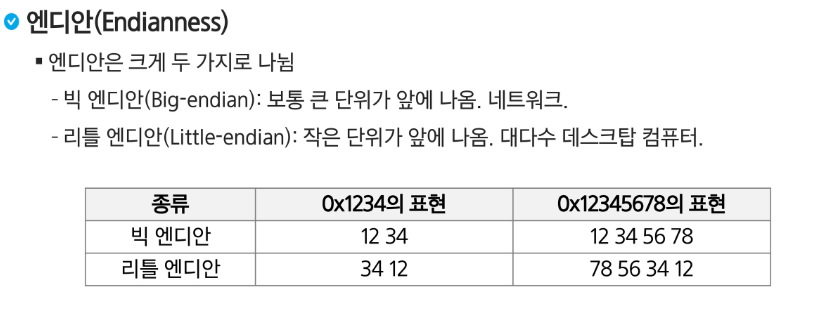

In [6]:
# 엔디안 확인 코드
import sys
print(sys.byteorder)


little


In [8]:
# 비트 연산 예제3
def ce(n):  # change endian
    p = []
    for i in range(0, 4):
        p.append((n >> (24 - i*8)) & 0xff)
    return p


x = 0x01020304
p = []
for i in range(0, 4):
    p.append((x >> (i*8)) & 0xff)

print("x = %d%d%d%d" % (p[0], p[1], p[2], p[3]))
p = ce(x)
print("x = %d%d%d%d" % (p[0], p[1], p[2], p[3]))


x = 4321
x = 1234


In [11]:
# 비트 연산 에제 4
def ce1(n):
    return (n << 24 & 0xff000000) | (n << 8 & 0xff0000) | (n >> 8 * 0xff00) | (n >> 24 & 0xff)

# 비트 연산 예제 5
# 비트연산자 ^를 두 번 연산하면 처음 값을 반환한다.


def Bbit_print(i):
    output = ""
    for j in range(7, -1, -1):
        output += "1" if i & (1 << j) else "0"
    print(output)


a = 0x86
key = 0xAA

print("a =>", end=' ')
Bbit_print(a)

print("a^=key =>", end=' ')
a ^= key
Bbit_print(a)

print("a^=key =>", end=' ')
a ^= key
Bbit_print(a)


a => 10000110
a^=key => 00101100
a^=key => 10000110


### 진수
10 진수 -> 타진수로 변환  
- 원하는 타진법의 수로 나눈뒤 나머지를 거꾸로 읽는다.  

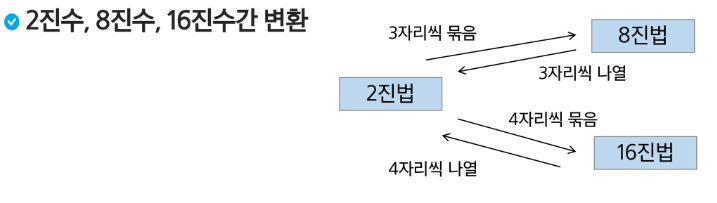

컴퓨터에서의 음의 정수 표현 방법  
- 1의 보수: 부호와 절대값으로 표현된 값을 부호 비트를 제외한 나머지 비트들을 0은 1로 1은 0으로 변환한다.  

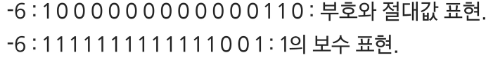
- 2의 보수: 1의 보수방법으로 표현된 값의 최하위 비트에 1을 더한다.  

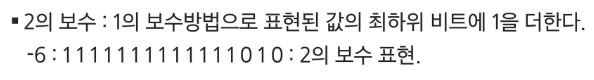

### 실수
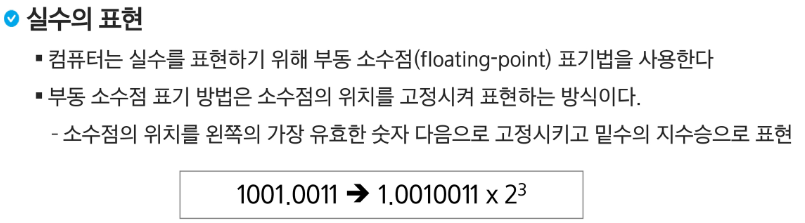

# 오프라인 19일차

In [15]:
def dfs(level, a, b):
    global lst, mi

    if level == 7:
        if mi > abs(sum(a) - sum(b)):
            mi = abs(sum(a) - sum(b))
            print("a: ", a)
            print("b: ", b)
            print(mi)
            print()
        return

    for i in range(2):
        if i:
            dfs(level + 1, a + [lst[level]], b)
        else:
            dfs(level + 1, a, b + [lst[level]])


mi = 21e8
lst = [49, 6, 54, 80, 3, 18, 71]
dfs(0, [], [])

print(mi)


a:  []
b:  [49, 6, 54, 80, 3, 18, 71]
281

a:  [71]
b:  [49, 6, 54, 80, 3, 18]
139

a:  [18, 71]
b:  [49, 6, 54, 80, 3]
103

a:  [3, 18, 71]
b:  [49, 6, 54, 80]
97

a:  [80, 71]
b:  [49, 6, 54, 3, 18]
21

a:  [54, 18, 71]
b:  [49, 6, 80, 3]
5

a:  [6, 54, 80]
b:  [49, 3, 18, 71]
1

1


In [3]:
def dfs(level, start):
    global lst, lst2, mi, n

    mi = min(mi, abs(sum(lst) - sum(lst2)))
    # print(f"#{n}")
    # n += 1
    # print(lst)
    # print(lst2)
    # print()

    if level == 7:
        return

    for i in range(start, 7):
        lst2[i] = lst[i]
        lst[i] = 0
        dfs(level + 1, i + 1)
        lst[i] = lst2[i]
        lst2[i] = 0


mi = 21e8
lst = [49, 6, 54, 80, 3, 18, 71]
lst2 = [0] * 7
n = 1

dfs(0, 0)
print(mi)


1


In [ ]:
score = [49, 6, 54, 80, 3, 18, 71]
Min = int(21e8)
check = [0] * 7


def dfs(start, level, sum):
    global Min
    against = 0
    for i in range(7):
        if check[i] == 0:
            against += score[i]

    gap = abs(sum - against)
    Min = min(Min, gap)

    if level == 6:
        return

    for i in range(start, 7):
        check[i] = 1
        dfs(i + 1, level + 1, sum + score[i])
        check[i] = 0


dfs(0, 0, 0)  # start,level, sum
print(Min)


In [7]:
from collections import deque


def bfs(v1, v2):
    global d, field, visited

    visited[v1][v2] = 1
    q = deque()
    q.append((v1, v2))
    field[v1][v2] = 1

    while q:
        temp_v1, temp_v2 = q.popleft()

        for i in range(4):
            drow = temp_v1 + d[i][0]
            dcol = temp_v2 + d[i][1]

            if 0 <= drow < 4 and 0 <= dcol < 4:
                if not visited[drow][dcol] and not field[drow][dcol]:
                    visited[drow][dcol] = 1
                    q.append((drow, dcol))


d = ((-1, 0), (1, 0), (0, -1), (0, 1))
field = [
    [0, 0, 0, 0],
    [1, 0, 1, 0],
    [1, 0, 1, 0],
    [0, 0, 0, 0]
]
visited = [[0]*4 for _ in range(4)]

bfs(0, 0)
res = visited[3][3]

if res:
    print("도착 가능!")
else:
    print("도착 불가능!")


도착 가능!


In [ ]:
arr = [[0, 0, 0, 0], [1, 0, 1, 0], [1, 0, 1, 0], [0, 0, 0, 0]]
visit = [[0]*4 for _ in range(4)]
flag = 0


def dfs(y, x):
    global flag
    if y == 3 and x == 3:
        flag = 1
        return
    directy = [-1, 1, 0, 0]
    directx = [0, 0, -1, 1]

    for i in range(4):
        dy = y+directy[i]
        dx = x+directx[i]
        if dy < 0 or dx < 0 or dy > 3 or dx > 3:
            continue
        if visit[dy][dx] == 1:
            continue
        if arr[dy][dx] == 1:
            continue
        visit[dy][dx] = 1
        dfs(dy, dx)
        if flag:
            return


visit[0][0] = 1
dfs(0, 0)
if flag:
    print('도착 가능')
else:
    print('도착 불가능')


In [14]:
import copy

def sum_lst(lst):
    s = 0
    for i in range(3):
        for j in range(3):
            s += lst[i][j]
    
    return s


def calc(num):
    return (num * 7) % 10


def dfs(level, arr1):
    global d, ma

    if level == 3:
        if ma < sum_lst(arr1):
            ma = sum_lst(arr1)
        return
    
    temp = copy.deepcopy(arr1)

    for i in range(3):
        for j in range(3):
            temp2 = copy.deepcopy(temp)
            temp2[i][j] = calc(temp2[i][j])
    
            for k in range(4):
                drow = i + d[k][0]
                dcol = j + d[k][1]

                if 0 <= drow < 3 and 0 <= dcol < 3:
                    temp2[drow][dcol] = calc(temp2[drow][dcol])
            
            dfs(level + 1, temp2)
            

d = ((-1, 0), (1, 0), (0, -1), (0, 1))
arr = [
    [3, 2, 7],
    [4, 5, 1],
    [7, 2, 8]
]
ma = 0
dfs(0, arr)
print(ma)

65
